In [2]:
# import os
# from PIL import Image
# def is_image_file(file_path):
#     try:
#         img = Image.open(file_path)
#         img.close()
#         return True
#     except Exception as e:
#         return False
# def delete_non_image_files(folder_path):
#     for root, dirs, files in os.walk(folder_path):
#         for file in files:
#             file_path = os.path.join(root, file)
#             if not is_image_file(file_path):
#                 os.remove(file_path)
#                 print(f"Deleted: {file_path}")
# dataset_dir = './data/dataset/all_images2'
# class_names = os.listdir(dataset_dir)
# # 비 이미지 파일 삭제
# for _ in dataset_dir:
#     dir = dataset_dir+_
#     delete_non_image_files(dir)

In [1]:
import os
from sklearn.model_selection import train_test_split
from shutil import copyfile

In [2]:
# 데이터셋 디렉토리 설정
dataset_dir = './data/dataset/all_images/'
train_dir = './data/dataset/train/'
test_dir = './data/dataset/test/'
validation_dir = './data/dataset/validation/'

In [3]:
# 클래스별 이미지 파일 수를 정의
class_names = os.listdir(dataset_dir)
print(len(class_names))
class_names

40


['간장게장',
 '갈비찜',
 '갈비탕',
 '감자전',
 '감자탕',
 '곱창구이',
 '김밥',
 '김치전',
 '김치찌개',
 '닭갈비',
 '닭볶음탕',
 '도토리묵',
 '된장찌개',
 '떡볶이',
 '막국수',
 '물냉면',
 '물회',
 '미역국',
 '배추김치',
 '불고기',
 '비빔냉면',
 '비빔밥',
 '삼겹살',
 '삼계탕',
 '설렁탕',
 '순대',
 '순두부찌개',
 '양념게장',
 '양념치킨',
 '육회',
 '잡채',
 '제육볶음',
 '족발',
 '주꾸미볶음',
 '짜장면',
 '칼국수',
 '파전',
 '해물찜',
 '황태구이',
 '후라이드치킨']

In [4]:
# 훈련, 검증, 테스트 데이터셋을 저장할 디렉토리를 생성합니다.
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)

In [41]:
# 각 클래스마다 훈련, 검증, 테스트 데이터를 나눕니다.
for class_name in class_names:
    class_dir = os.path.join(dataset_dir, class_name)
    train_class_dir = os.path.join(train_dir, class_name)
    test_class_dir = os.path.join(test_dir, class_name)
    validation_class_dir = os.path.join(validation_dir, class_name)
    
    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(test_class_dir, exist_ok=True)
    os.makedirs(validation_class_dir, exist_ok=True)
    
    # 해당 클래스의 모든 이미지 파일을 리스트로 가져옵니다.
    all_images = os.listdir(class_dir)
    
    # 데이터셋을 훈련, 테스트, 검증 데이터로 나눕니다.
    train_images, test_images = train_test_split(all_images, test_size=0.2, random_state=42)
    test_images, validation_images = train_test_split(test_images, test_size=0.5, random_state=42)
    
    # 훈련 데이터 복사
    for img in train_images:
        src_path = os.path.join(class_dir, img)
        dest_path = os.path.join(train_class_dir, img)
        copyfile(src_path, dest_path)
    
    # 테스트 데이터 복사
    for img in test_images:
        src_path = os.path.join(class_dir, img)
        dest_path = os.path.join(test_class_dir, img)
        copyfile(src_path, dest_path)
    
    # 검증 데이터 복사
    for img in validation_images:
        src_path = os.path.join(class_dir, img)
        dest_path = os.path.join(validation_class_dir, img)
        copyfile(src_path, dest_path)

print("데이터셋 분리가 완료되었습니다.")

데이터셋 분리가 완료되었습니다.


In [5]:
## 사용할 모델 라이브러리 import
import sys, os
from keras.models import Sequential # 모델 구조를 생성하는 라이브러리
from keras.layers import Convolution2D # 합성곱층을 생성하는 라이브러리(2차원 처리)
from keras.layers import MaxPooling2D # 합성곱층에서 생성된 특성맵을 단순화하는 층(2차원처리)
from keras.layers import Activation # 활성화함수 지정
from keras.layers import Dropout # 규제적용 층
from keras.layers import Flatten # 데이터를 1차원으로 변환시켜주는 층
from keras.layers import Dense # 밀집층
from keras.utils import np_utils
import numpy as np

In [6]:
import zipfile
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing import image

In [7]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)
# 검증, 테스트 데이터는 증강 사용하지 않음
val_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale= 1./255) 

In [11]:
# 검증, 테스트 데이터는 증강 사용하지 않음
val_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale= 1./255) 

In [12]:
## 이미지 증식 generator 생성
train_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size = 16, # gpu 연산 -> 2의 거듭제곱꼴로 맞추는 것이 좋다고 함
    seed = 42,
    class_mode = 'categorical'
)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size = (224, 224),
    batch_size = 16, # gpu 연산 -> 2의 거듭제곱꼴로 맞추는 것이 좋다고 함
    seed = 42,
    class_mode = 'categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224, 224),
    batch_size = 16, # gpu 연산 -> 2의 거듭제곱꼴로 맞추는 것이 좋다고 함
    seed = 42,
    class_mode = 'categorical'
)

Found 31995 images belonging to 40 classes.
Found 4017 images belonging to 40 classes.
Found 3994 images belonging to 40 classes.


In [15]:
model = tf.keras.models.Sequential([
    # 입력 크기는 원하는 이미지(224x224, 3채널)와 맞아야 합니다.
    # 첫 번째 합성곱 층
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', 
                            input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # 두 번째 합성곱 층
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # 네 번째 합성곱 층
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # 밀집 층에 전달하가 위해 펼칩니다.
    tf.keras.layers.Flatten(),
    # 512개 뉴런을 가진 은닉층
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
    # 출력층(다중분류이므로 softmax)
])

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                metrics=['accuracy'])

In [17]:
# 모델 저장 : model 디렉터리 생성

from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
import os

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

# model 안에 파일로 저장
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"

# EarlyStopping : 모델 최적화 단계에서 학습 자동 중단 설정  
checkpointer = ModelCheckpoint(filepath = modelpath,
                              monitor = 'val_loss',
                              verbose = 1,
                              save_best_only = True),
early_stopping_clbk = EarlyStopping(monitor = 'val_loss', patience = 50)

In [ ]:
history = model.fit(train_generator,
                   validation_data = validation_generator,
                   epochs = 100
                   ,callbacks = [early_stopping_clbk, checkpointer])
    

Epoch 1/100
  86/2000 [>.............................] - ETA: 3:23 - loss: 3.9141 - accuracy: 0.0349

C:\Anaconda3\envs\tf\lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


2000/2000 [==============================] - ETA: 0s - loss: 2.7634 - accuracy: 0.2292
Epoch 1: val_loss improved from inf to 2.41492, saving model to ./model\01-2.4149.hdf5
2000/2000 [==============================] - 267s 127ms/step - loss: 2.7634 - accuracy: 0.2292 - val_loss: 2.4149 - val_accuracy: 0.3159
Epoch 2/100
2000/2000 [==============================] - ETA: 0s - loss: 2.0386 - accuracy: 0.4165
Epoch 2: val_loss improved from 2.41492 to 2.23843, saving model to ./model\02-2.2384.hdf5
2000/2000 [==============================] - 248s 124ms/step - loss: 2.0386 - accuracy: 0.4165 - val_loss: 2.2384 - val_accuracy: 0.3851
Epoch 3/100
2000/2000 [==============================] - ETA: 0s - loss: 1.6873 - accuracy: 0.5247
Epoch 3: val_loss improved from 2.23843 to 2.08335, saving model to ./model\03-2.0834.hdf5
2000/2000 [==============================] - 221s 110ms/step - loss: 1.6873 - accuracy: 0.5247 - val_loss: 2.0834 - val_accuracy: 0.4334
Epoch 4/100
2000/2000 [============

2000/2000 [==============================] - 195s 98ms/step - loss: 1.2875 - accuracy: 0.7915 - val_loss: 14.4826 - val_accuracy: 0.3752
Epoch 30/100
2000/2000 [==============================] - ETA: 0s - loss: 1.2414 - accuracy: 0.7992
Epoch 30: val_loss did not improve from 2.08335
2000/2000 [==============================] - 181s 91ms/step - loss: 1.2414 - accuracy: 0.7992 - val_loss: 7.6322 - val_accuracy: 0.3849
Epoch 31/100
2000/2000 [==============================] - ETA: 0s - loss: 1.2302 - accuracy: 0.7944
Epoch 31: val_loss did not improve from 2.08335
2000/2000 [==============================] - 177s 89ms/step - loss: 1.2302 - accuracy: 0.7944 - val_loss: 14.1981 - val_accuracy: 0.3943
Epoch 32/100
2000/2000 [==============================] - ETA: 0s - loss: 1.2969 - accuracy: 0.7909
Epoch 32: val_loss did not improve from 2.08335
2000/2000 [==============================] - 186s 93ms/step - loss: 1.2969 - accuracy: 0.7909 - val_loss: 9.8451 - val_accuracy: 0.4035
Epoch 33/1

200/200 [==============================] - 37s 185ms/step - loss: 2.4185 - accuracy: 0.3796
Test Accuracy: 0.3796180486679077


ValueError: x and y must have same first dimension, but have shapes (100,) and (18,)

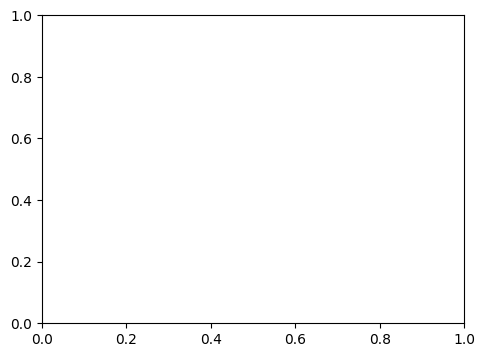

In [27]:
# 모델 평가
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc}')

# 학습 곡선 그리기
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, epochs+1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()